# Projet TNS - Filtre de Wienner

Dand ce projet, on s'intéresse au débruitage de signaux alèatoires en utilisant un filtre de Wiener de type RIF

In [ ]:
#import imortant libraries 
import scipy as sp
import numpy as np
import scipy.signal as SIG
from scipy.linalg import toeplitz,inv
import random
import matplotlib.pyplot as plt
import IPython
from scipy.io import wavfile

# Première Partie:

## Question 1:
Rappeler la forme de $R$ et $p$
<br>
$R$: Matrice d'autocorrélation de signal d'entrée $x[n]$
\begin{equation*}
R = E [x(n)x^T(n)]
\end{equation*}
$p$: Vecteur d'intercorrélation entre la sortie désirée $d(n)$ et l'entrée $x(n)$
\begin{equation*}
p = E[x(n)d(n)]
\end{equation*}


## Question 2:
Ecrire la sortie du filtre de Wiener optimal $\hat{d}(n)$ en fonction de $h_{opt}$ et $x(n) =[x, ... , x(n − L + 1)]^T$
<br>
\begin{equation*}
\hat{d}(n)=\sum_{k=0}^{L-1} h_{opt,k} x_{n-k}
\end{equation*}

## Question 3:
Pour l'application du filtrage de Wiener en débruitage, on a $x(n)= d(n) + u(n)$ avec $u(n)$ un bruit blanc, centre et de variance $\sigma_u^2$
<br>
On peut décomposer $R$ en 
$R = R_d+R_u$, 
<br> Et $p= r_d(l) $ <br>avec 
$R_u= Diag (\sigma_u^2,..,\sigma_u^2)$

## Question 4:

Le rapport signal à bruit,après débruitage, est donné par:
\begin{equation*}
RSB'_{db}=10  \log_{10}{\frac{E[d'^2(n)]}{E[b'^2(n)]}}
\end{equation*}
Avec $d'(n)=h_{opt}(n) * d(n)$
<br> et $u'(n) = h_{opt}(n) * u(n)$
<br> On va exprimer $E[d'^2(n)]$ et $E[u'^2(n)]$
<br> En ecriture matricielle , on aura  $E[d'^2(n)]= h_{opt}^T R_d  h_{opt}$  et   $E[u'^2(n)] = h_{opt}^T  R_u  h_{opt}$
<br> D'ou le rapport signal à bruit après débruitage est : 
\begin{equation*}
RSB'_{db}=10  \log_{10}{\frac{h_{opt}^T  R_d  h_{opt}}{h_{opt}^T  R_u  h_{opt}}}
\end{equation*}

## Question 5:
On a:
<br>
<br>
$
\begin{equation}   
\begin{array}
\ J(h) 
& = E[(d(n)-h^T x(n))^2]\\
& = E[d^2(n)]-2E[d(n)x^T(n)]h + h^T E[x(n)x^T(n)]h\\
& = \sigma_d^2-2p^Th+h^TRh\\
\end{array}
\end{equation}
$
<br>
<br>
A l'optimum, on a $h_{opt} = R^{-1}p$, donc
<br>
<br>
$
\begin{equation}   
\begin{array}
\ J_{min} 
& = J(h_{opt})\\
& = \sigma_d^2-p^TR^{-1}p\\
& = r_d(0)-h_{opt}^Tp\\
\end{array}
\end{equation}
$

# Deuxième partie: Implémentation

## Question 1:
On va générer N échantillions d'un signal de référence d(n) 
\begin{equation*} 
d(x)=sin(w_0*n+phi(n))
\end{equation*}


In [ ]:
N = 1000
w0 = 0.05*np.pi
random.seed(32)
#Génération de 1000 points à partir d'un distrinution uniforme
phi = np.random.uniform(0,2*np.pi,N)
t = np.arange(0,N,1)
d = np.sin(w0*t+0.1*phi)

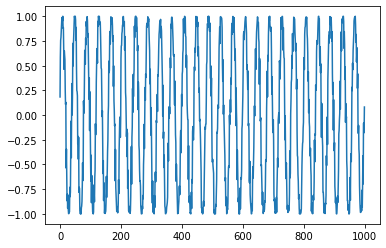

In [ ]:
plt.plot(d,label='d')

## Question 2:
Génération du signal bruité x(n) en utilisant un bruit blanc gaussien centré b(n)
\begin{equation*}
x(n)=d(n)+b(n)
\end{equation*}

In [ ]:
b = ((0.1)**(0.5))*np.random.randn(N)
# On additionne un bruit du au canal de transmission au signal d'origine
x = b+d


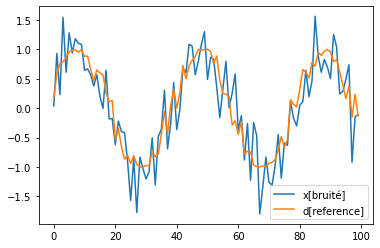

In [ ]:

fig, ax = plt.subplots()
ax.plot(x[:100],label="x[bruité]")
ax.plot(d[:100],label="d[reference]")
leg = ax.legend();

* Si on augmente la puissance de bruit le signal diverge

## Question 3:

On va commencer par déterminer la matrice d'autocorrélation R et le vecteur dintercorrélkation entre d(n) et x(n) puisque on a les résultat suivant
\begin{equation*}
h_{opt}=R^{-1}*p
\end{equation*}

In [ ]:
#Reshape x et d 
d = d.reshape(N)
x = x.reshape(N)
#Trouver l'inverse de R
Auto = np.correlate(x,x,mode='full')
Slice = Auto[999:1002]/(N-1)
R = toeplitz(Slice)
R_1 = inv(R)
#Trouver p
p = np.correlate(x,d,mode='full')
p = p[999:1002]/(N-1)
#Trouver h optimale
hopt = np.dot(R_1,p)

* On a trouvé une meilleure standardisation avec N-1 

In [ ]:
Autod = np.correlate(d,d,mode='full')
Sliced = Autod[999:1002]/(N-1)
Rd = toeplitz(Sliced)

In [ ]:
# Le vecteur solution du filtre qui minimise l'erreur quadratique 
hopt

array([0.48251857, 0.28041909, 0.18750896])

In [ ]:
# Matrice d'autocorrélation
R

array([[0.57692586, 0.44811896, 0.43736748],
       [0.44811896, 0.57692586, 0.44811896],
       [0.43736748, 0.44811896, 0.57692586]])

In [ ]:
#Vérification de l'inversibilité de R
from numpy import linalg as LA
W=LA.eig(R)
W

(array([1.46601528, 0.13955838, 0.1252039 ]),
 array([[-5.75802945e-01, -7.07106781e-01,  4.10427787e-01],
        [-5.80432543e-01, -9.72758317e-16, -8.14308334e-01],
        [-5.75802945e-01,  7.07106781e-01,  4.10427787e-01]]))

Toutes les valeurs propres sont strictement positives donc la matrice est inversible

## Question 4:
On va générer la sortie du filtre de Wiener
\begin{equation*}
\hat{d}[n]=\sum_{k=0}^{L-1} h_k x_{n-k}
\end{equation*}

In [ ]:
x_conv = np.reshape(x, x.size)
hopt_conv = np.reshape(hopt, hopt.size)
dhat = np.convolve(x_conv,hopt_conv,)

In [ ]:
dhat.size

1002

In [ ]:
#On élimine les deux premières valeurs 
d_hat=dhat[2:]

$\hat{d}$ est la sortie du filtre de Wiener

## Question 5:
On va visulaiser $d'(n)$, $d(n)$ et $\hat{d} (n)\$

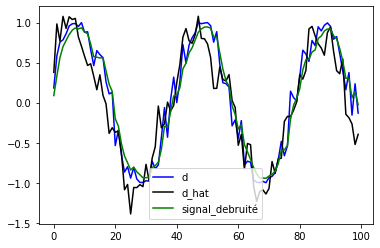

In [ ]:
# On génère le signale bruité
d_conv=np.reshape(d, d.size)
debruite=np.convolve(hopt_conv,d_conv)
#Visualisation

fig, ax = plt.subplots()

ax.plot(d[:100],color='blue',label='d');
ax.plot(d_hat[:100],color='black',label="d_hat");
ax.plot(debruite[:100],color='green',label="signal_debruité");

leg = ax.legend();

* le signal de référence d et le signal debruite sont presque confondu, ce qui est cohérent avec notre modèle

## Question 6:
Le rapport signal à bruit,avant débruitage, est donné par:
\begin{equation*}
RSB_{db}=10  \log_{10}{\frac{E[d^2(n)]}{E[b^2(n)]}}
\end{equation*}
Le rapport signal à bruit,après débruitage, est donné par:
\begin{equation*}
RSB'_{db}=10  \log_{10}{\frac{E[d'^2(n)]}{E[b'^2(n)]}}
\end{equation*}

Jmin se calcule par
\begin{equation*}
J_{min}=r_d(0)-h_{opt}^{T}p
\end{equation*}

In [ ]:
b.reshape(N,1)
b_conv = np.reshape(b, b.size)
b_deb = np.convolve(hopt_conv,b_conv)
# RSB aveant débruitage
RSB = 10*np.log10(np.mean(np.square(d))/np.mean(np.square(b)))
#RSB après débruitage
RSBa = 10*np.log10(np.mean(np.square(debruite))/np.mean(np.square(b_deb)))
print("RSB avant débruitage:",RSB, "et RSB' après débruitage:",RSBa)

#Caculer Jmin
#calcul de Rd 
#AutoD = SIG.correlate2d(d,d)
#SliceD = AutoD[999:1002]/AutoD.max()
#Rd = toeplitz(SliceD)
Jmin = Rd[0][0]-np.dot(np.transpose(hopt),p)
print("Jmin = ",Jmin)

RSB avant débruitage: 6.832872360477829 et RSB' après débruitage: 10.802873925090623
Jmin =  0.05103879337837225


* Le rapport signal à bruit mesure la variance relative du signal par rapport au bruit en décibel. Lorsque on diminue le bruit de phase la qualité de signal s'améliore.
* La déconvolution de Wiener est une opération mathématique appliquant un filtre de Wiener pour éliminer ou atténuer une partie des bruits dans un signal. Elle opère dans le domaine fréquentiel en essayant de minimiser l'impact du bruit là où le rapport signal/bruit est mauvais. 

## Question 7:

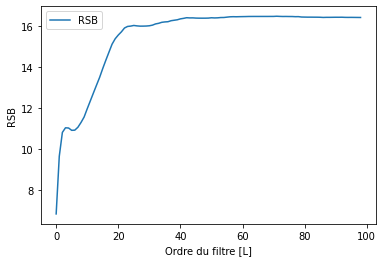

In [ ]:
RSBv = np.zeros(99)
JMINv = np.zeros(99)
List=[]
x=np.reshape(x, x.size)
d=np.reshape(d, d.size)
Auto = np.correlate(x,x,mode='full')
Autod = np.correlate(d,d,mode='full')
for L in range(1,100,1):
    #Trouver l'inverse de R
    n1 =N-1 
    n2 =N-1+L
    Slice = Auto[n1:n2]/(N-1)
    R = toeplitz(Slice)
    R_1 = inv(R)
    Sliced = Autod[n1:n2]/(N-1)
    Rd = toeplitz(Sliced)
    #p
    p = np.correlate(x,d,mode='full')
    p = p[n1:n2]/(N-1)
    #Trouver h optimale
    hopt = np.dot(R_1,p)
    hopt_conv = np.reshape(hopt, hopt.size)
    dhat = np.convolve(x_conv,hopt_conv,)
    d_hat=dhat[L-1:]
    d_conv=np.reshape(d, d.size)
    debruite=np.convolve(hopt_conv,d_conv)
    b_deb = np.convolve(hopt_conv,b_conv)
    RSBa = 10*np.log10(np.mean(np.square(debruite))/np.mean(np.square(b_deb)))
    Jmina = Rd[0][0]-np.dot(np.transpose(hopt),p)
    JMINv[L-1]=Jmina
    RSBv[L-1] = RSBa
fig, ax = plt.subplots()

ax.plot(RSBv,label="RSB")
plt.xlabel('Ordre du filtre [L]')
plt.ylabel('RSB')

leg = ax.legend();

Lorsque l'ordre de filtre augmente, on augmente le rapport signal bruit donc amélioration de la qualité de note signal, mais en contre partie on a besoin  calculer plusieurs coefficients

In [ ]:
#JMINv

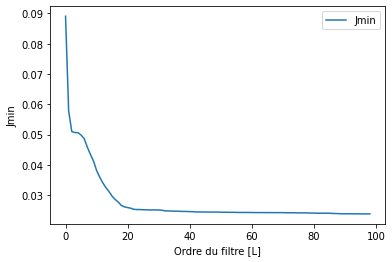

In [ ]:

fig, ax = plt.subplots()

ax.plot(JMINv,label="Jmin")
plt.xlabel('Ordre du filtre [L]')
plt.ylabel('Jmin')
leg = ax.legend();

De même l'erreur quadratique diminue, donc la reponse du filtre s'approche de plus en plus  vers le signal de réference. <br> 
 On a remarqué que si on idmune le bruit de phase , on atteint une limite de convergence pour L élevée.

## Question 8:

In [ ]:
pip install soundfile

In [ ]:
import soundfile as sf

In [ ]:
#On commence par lire notre signal
d=sf.read("jonasz_lucille_extrait.wav")

In [ ]:
d,rate=d[0],d[1]

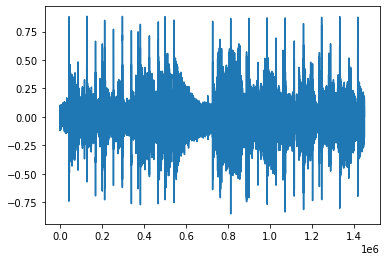

In [ ]:
plt.plot(d)

In [ ]:
len(d)

1450001

In [ ]:
#On va travailler sur une partie du signal
N=int(len(d)/8)

In [ ]:
d=d[:int(N)]

In [ ]:
len(d)

181250

In [ ]:
b = 0.02*np.random.randn(N)
x = b+d

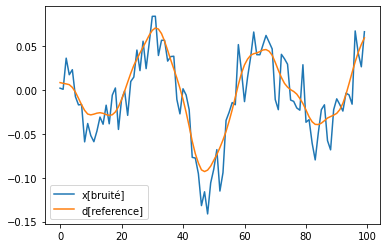

In [ ]:

fig, ax = plt.subplots()
ax.plot(x[:100],label="x[bruité]")
ax.plot(d[:100],label="d[reference]")
leg = ax.legend();

* On voit clairement l'effet du bruit additif sur le signal

In [ ]:
N

181250

In [ ]:
#Reshape x et d 
d = d.reshape(N,1)
x = x.reshape(N,1)
#Trouver l'inverse de R
Auto = SIG.correlate2d(x,x)
Slice = Auto[N-1:N+2]/(N-1)
R = toeplitz(Slice)
R_1 = inv(R)
#Trouver p
p = SIG.correlate2d(x,d)
p = p[N-1:N+2]/(N-1)
#Trouver h optimale
hopt = np.dot(R_1,p)

In [ ]:
AutoD = SIG.correlate2d(d,d)
SliceD = AutoD[N-1:N+2]/(N-1)
RD = toeplitz(SliceD)

In [ ]:
hopt

array([[0.56525295],
       [0.266749  ],
       [0.15495586]])

In [ ]:
x_conv = np.reshape(x, x.size)
hopt_conv = np.reshape(hopt, hopt.size)
dhat = np.convolve(x_conv,hopt_conv,)

In [ ]:
#On élimine les deux premières valeurs 
d_hat=dhat[2:]

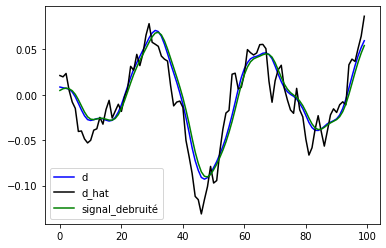

In [ ]:
# On génère le signale bruité
d_conv=np.reshape(d, d.size)
debruite=np.convolve(hopt_conv,d_conv)
#Visualisation
X_axis=np.arange(0,N)
fig, ax = plt.subplots()

ax.plot(d[:100],color='blue',label='d');
ax.plot(d_hat[:100],color='black',label="d_hat");
ax.plot(debruite[:100],color='green',label="signal_debruité");

leg = ax.legend();

* le signal de référence d et le signal debruite sont presque confondu, ce qui est cohérent avec notre modèle

In [ ]:
data2 = np.asarray(debruite)


In [ ]:
debruite.shape

(181252,)

In [ ]:
wavfile.write("example.wav", 44100, data2)

In [ ]:
b.reshape(N,1)
b_conv = np.reshape(b, b.size)
b_deb = np.convolve(hopt_conv,b_conv)
# RSB aveant débruitage
RSB = 10*np.log10(np.mean(np.square(d))/np.mean(np.square(b)))
#RSB après débruitage
RSBa = 10*np.log10(np.mean(np.square(debruite))/np.mean(np.square(b_deb)))
print("RSB avant débruitage:",RSB, "et RSB' après débruitage:",RSBa)

#Caculer Jmin
#calcul de Rd 
#AutoD = SIG.correlate2d(d,d)
#SliceD = AutoD[999:1002]/AutoD.max()
#Rd = toeplitz(SliceD)
Jmin = RD[0][0]-np.dot(np.transpose(hopt),p)
print("Jmin = ",Jmin)

RSB avant débruitage: 14.41118665474647 et RSB' après débruitage: 18.06790325963451
Jmin =  [[0.00022601]]


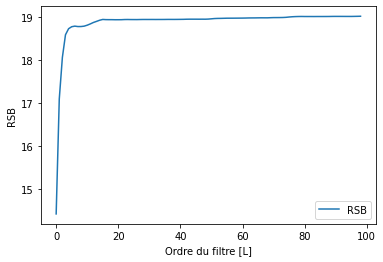

In [ ]:
RSBv = np.zeros(99)
JMINv = np.zeros(99)
List=[]
x=np.reshape(x, x.size)
d=np.reshape(d, d.size)
Auto = np.correlate(x,x,mode='full')
for L in range(1,100,1):
    #Trouver l'inverse de R
    
    n1 =N-1 
    n2 =N-1+L
    Slice = Auto[n1:n2]/(N-1)
    SliceD = AutoD[n1:n2]/(N-1)
    Rd = toeplitz(SliceD)
    R = toeplitz(Slice)
    R_1 = inv(R)
    #Trouver p
    List.append(np.linalg.det(R))
    p = np.correlate(x,d,mode='full')
    p = p[n1:n2]/(N-1)
    #Trouver h optimale
    hopt = np.dot(R_1,p)
    hopt_conv = np.reshape(hopt, hopt.size)
    dhat = np.convolve(x_conv,hopt_conv,)
    d_hat=dhat[L-1:]
    d_conv=np.reshape(d, d.size)
    debruite=np.convolve(hopt_conv,d_conv)
    b_deb = np.convolve(hopt_conv,b_conv)
    RSBa = 10*np.log10(np.mean(np.square(debruite))/np.mean(np.square(b_deb)))
    Jmina = Rd[0][0]-np.dot(np.transpose(hopt),p)
    JMINv[L-1]=Jmina
    RSBv[L-1] = RSBa
    
fig, ax = plt.subplots()

ax.plot(RSBv,label="RSB")
plt.xlabel('Ordre du filtre [L]')
plt.ylabel('RSB')

leg = ax.legend();

Lorsque l'ordre de filtre augmente, on augmente le rapport signal bruit donc amélioration de la qualité de note signal, mais en contre partie on a besoin  calculer plusieurs coefficients

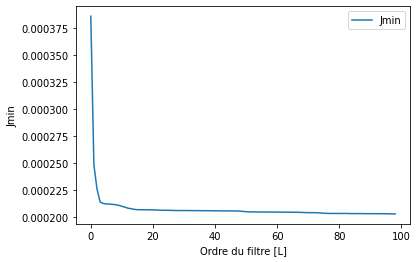

In [ ]:

fig, ax = plt.subplots()

ax.plot(JMINv,label="Jmin")
plt.xlabel('Ordre du filtre [L]')
plt.ylabel('Jmin')
leg = ax.legend();

De même l'erreur quadratique diminue, donc le filtre s'approche de plus vers le signal de réference. mais la contributions des premiers coefficients est beaucoup plus importantes que le suivants.

## fenetrage 1

On va refaire le même travail en travaillant sur des fenetres périodiques, ce qui nous ammène de la non stationarité du signal. 

In [ ]:
List_x=[]
List_d=[]
List_b=[]
for i in range(1324):
    List_d.append(d[i*99:i*99+99])
    List_x.append(x[i*99:i*99+99])
    List_b.append(b[i*99:i*99+99])

In [ ]:
List_RSB=[]
List_RSBa=[]
List_Jmin=[]
H_opt_audio = np.array([])
Dhat_audio = np.array([])
List_Jmin = []
rsb = []
List_debruite= np.array([])
for i in range(len(List_x)-1):
    #Reshape x et d
    List_d[i] = List_d[i].reshape(len(List_d[i]),1)
    List_x[i] = List_x[i].reshape(len(List_x[i]),1)
    #Trouver l'inverse de R
    Auto = SIG.correlate2d(List_x[i],List_x[i])
    AutoD = SIG.correlate2d(List_d[i],List_d[i])
    Slice = Auto[len(List_d[i])-1:len(List_d[i])+2]/(N-1)
    SliceD = AutoD[len(List_d[i])-1:len(List_d[i])+2]/(N-1)
    R = toeplitz(Slice)
    Rd = toeplitz(SliceD)
    R_1 = inv(R)
    #Trouver p
    p = SIG.correlate2d(List_x[i],List_d[i])
    p = p[len(List_d[i])-1:len(List_d[i])+2]/(N-1)
    #Trouver h optimale
    hopt = np.dot(R_1,p)
    H_opt_audio = np.concatenate((H_opt_audio,hopt), axis=None)
    
    x_conv = np.reshape(List_x[i], List_x[i].size)
    hopt_conv = np.reshape(hopt,hopt.size)
    dhat = np.convolve(x_conv,hopt_conv,)
    dhat=dhat[2:]
    Dhat_audio = np.concatenate((Dhat_audio,dhat), axis=None)    
    d_conv=np.reshape(List_d[i], List_d[i].size)
    debruite=np.convolve(hopt_conv,d_conv)
    debruite=debruite[2:]
    List_debruite = np.concatenate((List_debruite,debruite), axis=None)
    b_conv = np.reshape(List_b[i], List_b[i].size)
    b_conv=np.reshape(len(b_conv),1)
    b_deb = np.convolve(hopt_conv,b_conv)
    # RSB aveant débruitage
    RSB = 10*np.log10(np.mean(np.square(List_d[i]))/np.mean(np.square(List_b[i])))
    #RSB après débruitage
    RSBa = 10*np.log10(np.mean(np.square(List_debruite[i]))/np.mean(np.square(b_deb)))
    List_RSB.append(RSB)
    List_RSBa.append(RSBa)
    Jmin = Rd[0][0]-np.dot(np.transpose(hopt),p)
    List_Jmin.append(Jmin)

In [ ]:
print("Jmin=",np.mean(List_Jmin))
print("la moyenne des RSBa localement est",np.mean(R))

Jmin= 1.0962776261960783e-07
la moyenne des RSBa localement est 2.7960373793203983e-05


In [ ]:
RSB_d = 10*np.log10(np.mean(np.square(np.convolve(Dhat_audio, H_opt_audio))/
                    (np.mean(np.square(np.convolve(b, H_opt_audio))))))
print(RSB_d)

23.30160323181008


Comme on peut clairement remarqué , en tenant compte de la stationnarité du signal , Jmin s'est amélioré de plus (1.0962776261960783e-07<0.00022601)et donc on s'approche de plus en plus du signal reference. En plus, le rapport bruit signal est maintenant de 23.3 > 18. Donc , en tennant compte de la stationnarité, nous avons obtenu une meilleur qualité de signal.